In [2]:
!pip install kaggle

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download hassan06/nslkdd/

Dataset URL: https://www.kaggle.com/datasets/hassan06/nslkdd/versions/
License(s): unknown
 36% 5.00M/13.9M [00:00<00:00, 43.9MB/s]
100% 13.9M/13.9M [00:00<00:00, 86.8MB/s]


In [5]:
!unzip nslkdd

Archive:  nslkdd.zip
  inflating: KDDTest+.arff           
  inflating: KDDTest+.txt            
  inflating: KDDTest-21.arff         
  inflating: KDDTest-21.txt          
  inflating: KDDTest1.jpg            
  inflating: KDDTrain+.arff          
  inflating: KDDTrain+.txt           
  inflating: KDDTrain+_20Percent.arff  
  inflating: KDDTrain+_20Percent.txt  
  inflating: KDDTrain1.jpg           
  inflating: index.html              
  inflating: nsl-kdd/KDDTest+.arff   
  inflating: nsl-kdd/KDDTest+.txt    
  inflating: nsl-kdd/KDDTest-21.arff  
  inflating: nsl-kdd/KDDTest-21.txt  
  inflating: nsl-kdd/KDDTest1.jpg    
  inflating: nsl-kdd/KDDTrain+.arff  
  inflating: nsl-kdd/KDDTrain+.txt   
  inflating: nsl-kdd/KDDTrain+_20Percent.arff  
  inflating: nsl-kdd/KDDTrain+_20Percent.txt  
  inflating: nsl-kdd/KDDTrain1.jpg   
  inflating: nsl-kdd/index.html      


In [6]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
!pip install -q keras
from keras.utils import to_categorical
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#train+, test+ and test21- dataset loading
train='/content/nsl-kdd/KDDTrain+.txt'
test='/content/nsl-kdd/KDDTest+.txt'
test21='/content/nsl-kdd/KDDTest-21.txt'

featureV=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flagV=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_typeV=['tcp','udp','icmp']

serviceV=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}

In [8]:
train

'/content/nsl-kdd/KDDTrain+.txt'

In [9]:
train_data=pd.read_csv(train,names=featureV)
test_data=pd.read_csv(test,names=featureV)

In [10]:
test_21 = pd.read_csv(test21, names= featureV)

In [11]:
train_data = train_data.query("service != 'aol'")
train_data = train_data.query("service != 'harvest'")
train_data = train_data.query("service != 'http_2784'")
train_data = train_data.query("service != 'http_8001'")
train_data = train_data.query("service != 'red_i'")
train_data = train_data.query("service != 'urh_i'")
train_data = train_data.query("service != 'printer'")
train_data = train_data.query("service != 'rje'")


#-------------------------------------------------------------------------------->>>>

test_data = test_data.query("service != 'printer'")
test_data = test_data.query("service != 'rje'")

In [12]:
def bar_graph(feature):
    train_data[feature].value_counts().plot(kind="bar")

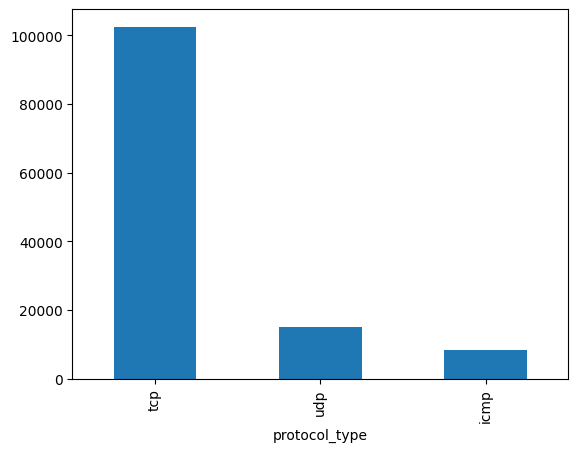

In [13]:
bar_graph('protocol_type')

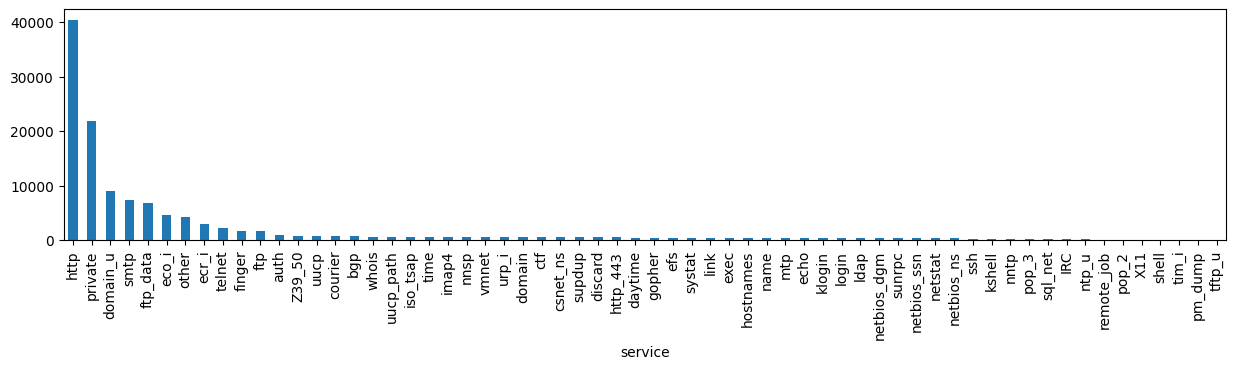

In [14]:
plt.figure(figsize=(15,3))
bar_graph('service')

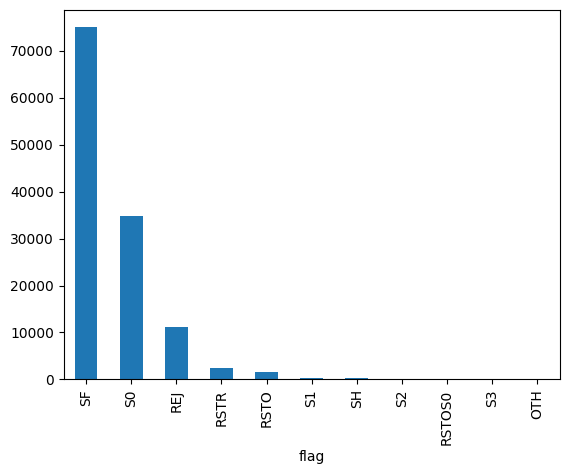

In [15]:
bar_graph('flag')

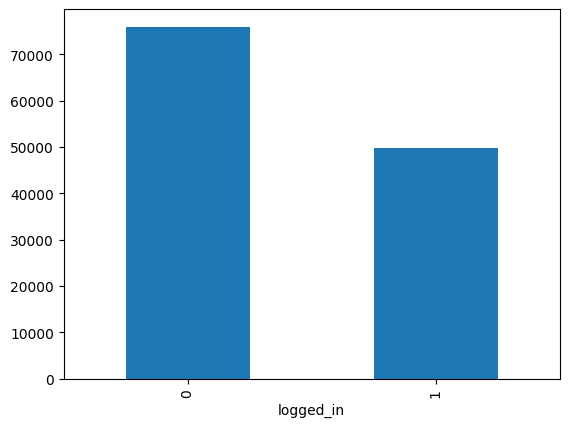

In [16]:
bar_graph('logged_in')

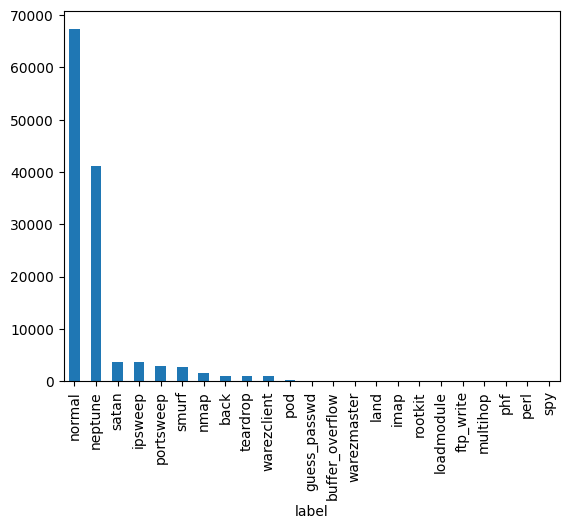

In [17]:
bar_graph('label')

In [18]:
def preprocessing(data,cls,df):

#----------attack categorization----------------->
  data['label']=data['label'].replace(['normal.','normal'],0)

#----------------------binary classification--------------------->
  if cls=='binary':
    for i in range(len(binary_attack)):
      data['label'] = data['label'].replace(binary_attack[i], 1)

#---------------multiclass classification-------------------->
  elif cls=='multiclass':
    for i in range(len(multiclass_attack['probe'])):
      data['label']=data['label'].replace([multiclass_attack['probe'][i],multiclass_attack['probe'][i][:-1]],1)

    for i in range(len(multiclass_attack['dos'])):
      data['label']=data['label'].replace([multiclass_attack['dos'][i],multiclass_attack['dos'][i][:-1]],2)

    for i in range(len(multiclass_attack['u2r'])):
      data['label']=data['label'].replace([multiclass_attack['u2r'][i],multiclass_attack['u2r'][i][:-1]],3)

    for i in range(len(multiclass_attack['r2l'])):
      data['label'] = data['label'].replace([multiclass_attack['r2l'][i],multiclass_attack['r2l'][i][:-1]],4)
#------------------------------------------------>


#-------------------------splitting features and labels---------------->
  y=data['label']
  x=data.loc[:,'duration':'hot']
#---------------------------------------------------------------------->


#-----------------------------------converting string objects to int------------------------>
  #for i in range(len(protocol_typeV)):
   # x['protocol_type'] = x['protocol_type'].replace(protocol_typeV[i], i)

  #for i in range(len(serviceV)):
   # x['service'] = x['service'].replace(serviceV[i], i+1)

  #for i in range(len(flagV)):
   # x['flag'] = x['flag'].replace(flagV[i], i+1)
#------------------------------------------------------------------------------------------->

#-----------------converting to binary feature vectors-------------------------------------->
  t=x.protocol_type.copy()
  t=pd.get_dummies(t)
  x=x.drop(columns='protocol_type',axis=1)
  x=x.join(t)

  t1=x.service.copy()
  t1=pd.get_dummies(t1)
  x=x.drop(columns='service',axis=1)
  x=x.join(t1)

  t2=x.flag.copy()
  t2=pd.get_dummies(t2)
  x=x.drop(columns='flag',axis=1)
  x=x.join(t2)
#------------------------------------------------------------------------------>

#-----------------converting to binary label vectors-------------------------------------->
  yt=y.copy()
  yt=pd.get_dummies(yt)
#------------------------------------------------------------------------------>

  x = MinMaxScaler(feature_range=(0, 1)).fit_transform(x)
  # x = MaxAbsScaler().fit_transform(x)
  # x = StandardScaler().fit_transform(x)
  #print(x)
  #vectorizer = CountVectorizer()
  #p= vectorizer.fit_transform(x.protocol_type)

  #print(np.shape(p))
  #scaler = Normalizer(norm='l1').fit(x)
  #trainX = scaler.transform(x)
  if df=='train':
    return x,yt
  else:
    return x,y

In [19]:
x_train,Y_train=preprocessing(train_data,cls='binary',df='train')
x_test,Y_test=preprocessing(test_data,cls='binary',df='test')

In [20]:
x_21_test, y_21_test = preprocessing(test_21, cls = 'binary', df = 'test21')

In [21]:
print(np.shape(x_train))
print(np.shape(Y_train))
print(np.shape(x_test))
print(np.shape(Y_test))
print(np.shape(x_21_test))
print(np.shape(y_21_test))

(125793, 83)
(125793, 2)
(22525, 83)
(22525,)
(11850, 83)
(11850,)


In [22]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(125793, 83, 1)

In [23]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(22525, 83, 1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN, GRU, Activation, BatchNormalization, Conv1D, Flatten, MaxPooling1D, AveragePooling1D
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D , AveragePooling1D


In [25]:
model = Sequential()

model.add(Convolution1D(32, 3, padding="same",activation="relu",input_shape = (x_train.shape[1], 1)))
# model.add(Convolution1D(32, 3, activation="relu"))
model.add(MaxPooling1D(pool_size=(4)))
# model.add(tf.keras.layers.LayerNormalization())
# model.add(GRU(units = 128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.5))

model.add(Convolution1D(64, 3, padding="same",activation="relu"))
# model.add(Convolution1D(64, 3,activation="relu"))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.5))
# model.add(tf.keras.layers.LayerNormalization())

# model.add(Convolution1D(64, 3, padding="same",activation="relu"))
# model.add(Convolution1D(64, 3,activation="relu"))
# model.add(AveragePooling1D(pool_size=(2)))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))

In [26]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [27]:
# tf.keras.optimizers.Adam(
#     learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
# train_op = tf.keras.optimizers.adam(amsgrad=True)
model.compile(optimizer ='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, Y_train, epochs = 100, batch_size = 128)

Epoch 1/100
983/983 [==============================] - 15s 7ms/step - loss: 0.1775 - accuracy: 0.9413
Epoch 2/100
983/983 [==============================] - 8s 8ms/step - loss: 0.1497 - accuracy: 0.9526
Epoch 3/100
983/983 [==============================] - 5s 5ms/step - loss: 0.1453 - accuracy: 0.9535
Epoch 4/100
983/983 [==============================] - 5s 5ms/step - loss: 0.1405 - accuracy: 0.9543
Epoch 5/100
983/983 [==============================] - 4s 4ms/step - loss: 0.1345 - accuracy: 0.9551
Epoch 6/100
983/983 [==============================] - 4s 4ms/step - loss: 0.1305 - accuracy: 0.9554
Epoch 7/100
983/983 [==============================] - 4s 4ms/step - loss: 0.1289 - accuracy: 0.9555
Epoch 8/100
983/983 [==============================] - 4s 4ms/step - loss: 0.1270 - accuracy: 0.9558
Epoch 9/100
983/983 [==============================] - 4s 4ms/step - loss: 0.1263 - accuracy: 0.9558
Epoch 10/100
983/983 [==============================] - 4s 4ms/step - loss: 0.1246 - accur

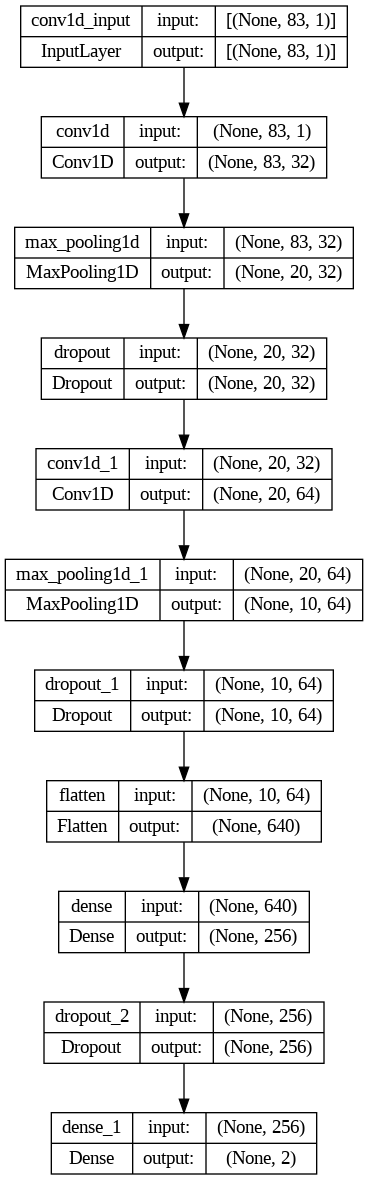

In [28]:
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)

In [29]:
pred = model.predict(x_test)
y_pred= np.argmax(pred, axis = 1)

704/704 [==============================] - 2s 2ms/step


In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)

In [31]:
confusion_matrix(Y_test, y_pred)

array([[8725,  986],
       [3102, 9712]])

In [32]:
accuracy =accuracy_score(Y_test, y_pred)*100
print(accuracy)

81.85127635960045


In [33]:
print(y_pred)
print(len(y_pred))

[1 1 0 ... 0 0 1]
22525


In [34]:
print(y_21_test)

0        1
1        1
2        1
3        0
4        1
        ..
11845    0
11846    0
11847    1
11848    1
11849    1
Name: label, Length: 11850, dtype: int64


In [35]:
print(x_21_test)
print(len(x_21_test))

[[2.25244737e-04 1.87821381e-06 1.88181138e-03 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.00350914e-07 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.41442065e-05 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.73265182e-05 0.00000000e+00 1.16400704e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.52599715e-07 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]
11850


In [36]:
# Assuming x_21_test is a numpy array
# Reshape x_21_test to match model's input shape
x_21_test_reshaped = x_21_test.reshape(x_21_test.shape[0], x_21_test.shape[1], 1)


In [37]:
# Predict with reshaped test data
pred = model.predict(x_21_test_reshaped)
y_pred = np.argmax(pred, axis=1)


371/371 [==============================] - 1s 2ms/step


In [38]:
# pred = model.predict(x_21_test)
# y_pred= np.argmax(pred, axis = 1)

In [39]:
confusion_matrix(y_21_test, y_pred)

array([[1207,  945],
       [3102, 6596]])

In [40]:
print(y_pred)

[0 1 0 ... 1 1 1]


In [41]:
acc_21 = accuracy_score(y_21_test, y_pred)* 100
print(acc_21)

65.84810126582279


In [42]:
recall = recall_score(y_21_test, y_pred , average="binary")
precision = precision_score(y_21_test, y_pred , average="binary")
f1 = f1_score(y_21_test, y_pred, average="binary")

In [43]:
  print("accuracy")
  print("%.3f" %acc_21)
  print("racall")
  print("%.3f" %recall)
  print("precision")
  print("%.3f" %precision)
  print("f1score")
  print(f1)

accuracy
65.848
racall
0.680
precision
0.875
f1score
0.7652416033412611


In [44]:
print("F-Score : ", f1*100)
print("Precision : " , precision*100)
print("Recall : ", recall*100)
print("Accuracy : ",acc_21)

F-Score :  76.52416033412611
Precision :  87.4685055032489
Recall :  68.01402351000206
Accuracy :  65.84810126582279


lstm


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(x_train.shape[1], 1)))  # LSTM layer with 64 units
lstm_model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
lstm_model.add(Dense(2, activation='softmax'))  # Output layer with softmax activation for binary classification

# Compile LSTM model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train LSTM model
lstm_model.fit(x_train, Y_train, epochs=100, batch_size=128)

# Predict using LSTM model
lstm_pred = lstm_model.predict(x_test)
lstm_y_pred = np.argmax(lstm_pred, axis=1)

# Evaluate LSTM model
lstm_accuracy = accuracy_score(Y_test, lstm_y_pred) * 100
lstm_recall = recall_score(Y_test, lstm_y_pred, average='binary')
lstm_precision = precision_score(Y_test, lstm_y_pred, average='binary')
lstm_f1 = f1_score(Y_test, lstm_y_pred, average='binary')

print("LSTM Model Evaluation:")
print(f"Accuracy: {lstm_accuracy:.3f}")
print(f"Recall: {lstm_recall:.3f}")
print(f"Precision: {lstm_precision:.3f}")
print(f"F1 Score: {lstm_f1:.3f}")


Epoch 1/100
983/983 [==============================] - 9s 6ms/step - loss: 0.2541 - accuracy: 0.9006
Epoch 2/100
983/983 [==============================] - 6s 6ms/step - loss: 0.1624 - accuracy: 0.9488
Epoch 3/100
983/983 [==============================] - 6s 6ms/step - loss: 0.1538 - accuracy: 0.9508
Epoch 4/100
983/983 [==============================] - 7s 7ms/step - loss: 0.1474 - accuracy: 0.9527
Epoch 5/100
983/983 [==============================] - 6s 6ms/step - loss: 0.1445 - accuracy: 0.9538
Epoch 6/100
983/983 [==============================] - 7s 7ms/step - loss: 0.1413 - accuracy: 0.9550
Epoch 7/100
983/983 [==============================] - 6s 6ms/step - loss: 0.1367 - accuracy: 0.9567
Epoch 8/100
983/983 [==============================] - 7s 7ms/step - loss: 0.1494 - accuracy: 0.9527
Epoch 9/100
983/983 [==============================] - 6s 6ms/step - loss: 0.1439 - accuracy: 0.9561
Epoch 10/100
983/983 [==============================] - 7s 7ms/step - loss: 0.1412 - accura

GRU model

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Define GRU model
gru_model = Sequential()
gru_model.add(GRU(64, input_shape=(x_train.shape[1], 1)))  # GRU layer with 64 units
gru_model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
gru_model.add(Dense(2, activation='softmax'))  # Output layer with softmax activation for binary classification

# Compile GRU model
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
# Train GRU model
gru_model.fit(x_train, Y_train, epochs=100, batch_size=128)


Epoch 1/100
983/983 [==============================] - 9s 7ms/step - loss: 0.3030 - accuracy: 0.8826
Epoch 2/100
983/983 [==============================] - 5s 6ms/step - loss: 0.1870 - accuracy: 0.9379
Epoch 3/100
983/983 [==============================] - 6s 6ms/step - loss: 0.1751 - accuracy: 0.9459
Epoch 4/100
983/983 [==============================] - 6s 6ms/step - loss: 0.1672 - accuracy: 0.9492
Epoch 5/100
983/983 [==============================] - 5s 5ms/step - loss: 0.1671 - accuracy: 0.9487
Epoch 6/100
983/983 [==============================] - 6s 7ms/step - loss: 0.1578 - accuracy: 0.9524
Epoch 7/100
983/983 [==============================] - 5s 5ms/step - loss: 0.1642 - accuracy: 0.9497
Epoch 8/100
983/983 [==============================] - 6s 6ms/step - loss: 0.1574 - accuracy: 0.9525
Epoch 9/100
983/983 [==============================] - 6s 6ms/step - loss: 0.1562 - accuracy: 0.9527
Epoch 10/100
983/983 [==============================] - 5s 6ms/step - loss: 0.1540 - accura

In [48]:

# Predict using GRU model
gru_pred = gru_model.predict(x_test)
gru_y_pred = np.argmax(gru_pred, axis=1)

# Evaluate GRU model
gru_accuracy = accuracy_score(Y_test, gru_y_pred) * 100
gru_recall = recall_score(Y_test, gru_y_pred, average='binary')
gru_precision = precision_score(Y_test, gru_y_pred, average='binary')
gru_f1 = f1_score(Y_test, gru_y_pred, average='binary')

print("GRU Model Evaluation:")
print(f"Accuracy: {gru_accuracy:.3f}")
print(f"Recall: {gru_recall:.3f}")
print(f"Precision: {gru_precision:.3f}")
print(f"F1 Score: {gru_f1:.3f}")

704/704 [==============================] - 2s 2ms/step
GRU Model Evaluation:
Accuracy: 80.302
Recall: 0.730
Precision: 0.905
F1 Score: 0.808


In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Define Dense Neural Network model
model_dense = Sequential()
model_dense.add(Dense(256, input_shape=(x_train.shape[1],), activation='relu'))  # Dense layer with ReLU activation
model_dense.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model_dense.add(Dense(128, activation='relu'))  # Dense layer with ReLU activation
model_dense.add(Dense(2, activation='softmax'))  # Output layer with softmax activation for binary classification

In [51]:
# Compile Dense Neural Network model
model_dense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display Dense Neural Network model architecture
model_dense.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               21504     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 2)                 258       
                                                                 
Total params: 54658 (213.51 KB)
Trainable params: 54658 (213.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
# Train Dense Neural Network model
history_dense = model_dense.fit(x_train, Y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
787/787 [==============================] - 4s 6ms/step - loss: 0.0810 - accuracy: 0.9702 - val_loss: 0.0859 - val_accuracy: 0.9702
Epoch 2/100
787/787 [==============================] - 4s 5ms/step - loss: 0.0810 - accuracy: 0.9702 - val_loss: 0.0843 - val_accuracy: 0.9702
Epoch 3/100
787/787 [==============================] - 5s 6ms/step - loss: 0.0803 - accuracy: 0.9705 - val_loss: 0.0836 - val_accuracy: 0.9701
Epoch 4/100
787/787 [==============================] - 6s 8ms/step - loss: 0.0803 - accuracy: 0.9707 - val_loss: 0.0833 - val_accuracy: 0.9702
Epoch 5/100
787/787 [==============================] - 6s 7ms/step - loss: 0.0804 - accuracy: 0.9709 - val_loss: 0.0815 - val_accuracy: 0.9731
Epoch 6/100
787/787 [==============================] - 6s 7ms/step - loss: 0.0804 - accuracy: 0.9709 - val_loss: 0.0821 - val_accuracy: 0.9731
Epoch 7/100
787/787 [==============================] - 6s 7ms/step - loss: 0.0802 - accuracy: 0.9709 - val_loss: 0.0834 - val_accuracy: 0.9702

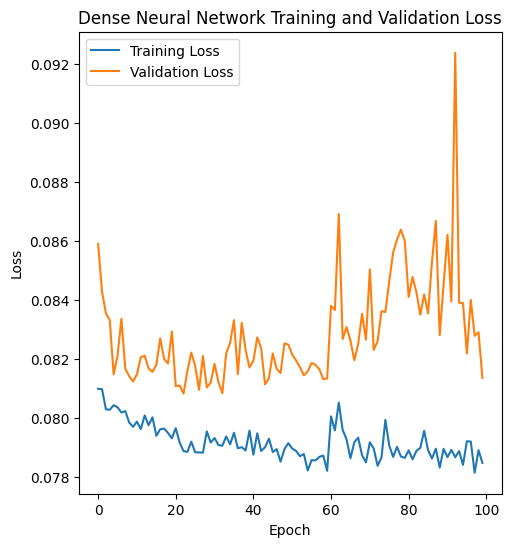

In [54]:
# Plot training history of Dense Neural Network model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dense.history['loss'], label='Training Loss')
plt.plot(history_dense.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Dense Neural Network Training and Validation Loss')
plt.legend()


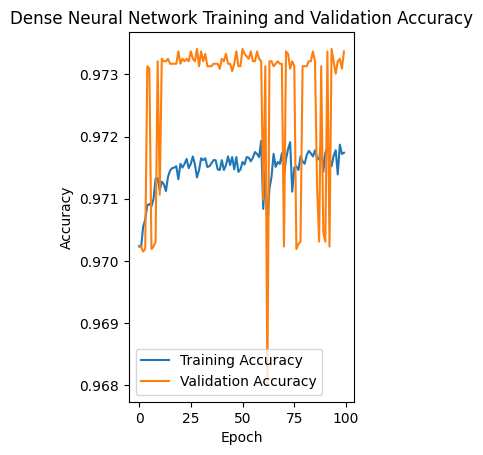

In [55]:

plt.subplot(1, 2, 2)
plt.plot(history_dense.history['accuracy'], label='Training Accuracy')
plt.plot(history_dense.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Dense Neural Network Training and Validation Accuracy')
plt.legend()
plt.show()

In [56]:

# Predict using Dense Neural Network model
pred_dense = model_dense.predict(x_test)
y_pred_dense = np.argmax(pred_dense, axis=1)

704/704 [==============================] - 1s 1ms/step


In [57]:
# Evaluate Dense Neural Network model
accuracy_dense = accuracy_score(Y_test, y_pred_dense) * 100
recall_dense = recall_score(Y_test, y_pred_dense, average='binary')
precision_dense = precision_score(Y_test, y_pred_dense, average='binary')
f1_dense = f1_score(Y_test, y_pred_dense, average='binary')

In [58]:
# Display evaluation metrics of Dense Neural Network model
print("Dense Neural Network Model Evaluation:")
print(f"Accuracy: {accuracy_dense:.3f}")
print(f"Recall: {recall_dense:.3f}")
print(f"Precision: {precision_dense:.3f}")
print(f"F1 Score: {f1_dense:.3f}")

Dense Neural Network Model Evaluation:
Accuracy: 79.463
Recall: 0.714
Precision: 0.905
F1 Score: 0.798


In [64]:
# Confusion Matrix of Dense Neural Network model
cm_dense = confusion_matrix(Y_test.argmax(axis=1), y_pred_dense)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dense, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Dense Neural Network)')
plt.show()

ValueError: `axis` must be fewer than the number of dimensions (1)